In [2]:
import pandas as pd
import imageio
import seaborn as sns

fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
life= pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
population = pd.read_excel('gapminder_population.xlsx', index_col = 0)

In [3]:
ncol = [int(x) for x in fert.columns]
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [4]:
sfert = fert.stack()
slife = life.stack()
spop = population.stack()

In [6]:
d = {'fertility': sfert, 
     'lifeexp': slife,
    'population':spop}
df2 = pd.DataFrame(data=d)

df2.shape


(47688, 3)

In [8]:
df3=df2.stack()
df3.head()

Afghanistan  1800  fertility           7.00
                   lifeexp            28.21
                   population    3280000.00
             1801  fertility           7.00
                   lifeexp            28.20
dtype: float64

In [9]:
df4 = df3.unstack((0,2))
df4.head()


Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp population            population fertility lifeexp   
1800         7.0   28.21  3280000.0                   NaN       4.6    35.4   
1801         7.0   28.20        NaN                   NaN       4.6    35.4   
1802         7.0   28.19        NaN                   NaN       4.6    35.4   
1803         7.0   28.18        NaN                   NaN       4.6    35.4   
1804         7.0   28.17        NaN                   NaN       4.6    35.4   

                  Algeria                     ...      Yemen Yugoslavia  \
     population fertility lifeexp population  ... population population   
1800   410445.0      6.99   28.82  2503218.0  ...  2593000.0        NaN   
1801        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1803        NaN      6.99   28.82        NaN  ...        NaN        NaN   
1804        NaN      6.99   28.82        NaN  ...        NaN        NaN   

        Zambia                     Zimbabwe                         Åland  \
     fertility lifeexp population fertility lifeexp population population   
1800      6.71    32.6   747000.0      6.75    33.7  1085814.0        NaN   
1801      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1802      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1803      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1804      6.71    32.6        NaN      6.75    33.7        NaN        NaN   

              
     lifeexp  
1800     NaN  
1801     NaN  
1802     NaN  
1803     NaN  
1804     NaN  

[5 rows x 667 columns]

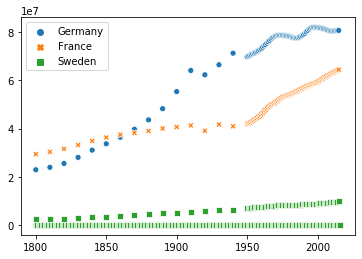

In [10]:
sns.scatterplot(data=df4[['Germany', 'France', 'Sweden']], legend = "full")


In [18]:
df5 = df3.unstack(2)
df5.unstack().head()


fertility                                            \
                           1800  1801  1802  1803  1804  1805  1806  1807   
Afghanistan                7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Akrotiri and Dhekelia       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                    4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria                    6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   
American Samoa              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                   ...  population                          \
                       1808  1809  ...        2007        2008        2009   
Afghanistan            7.00  7.00  ...  25877544.0  26528741.0  27207291.0   
Akrotiri and Dhekelia   NaN   NaN  ...     15700.0     15700.0         NaN   
Albania                4.60  4.60  ...   3010849.0   2968026.0   2929886.0   
Algeria                6.99  6.99  ...  34261971.0  34811059.0  35401790.0   
American Samoa          NaN   NaN  ...     57904.0     57031.0     56226.0   

                                                                       \
                             2010        2011        2012        2013   
Afghanistan            27962207.0  28809167.0  29726803.0  30682500.0   
Akrotiri and Dhekelia         NaN         NaN         NaN         NaN   
Albania                 2901883.0   2886010.0   2880667.0   2883281.0   
Algeria                36036159.0  36717132.0  37439427.0  38186135.0   
American Samoa            55636.0     55316.0     55227.0     55302.0   

                                                    
                             2014        2015 2016  
Afghanistan            31627506.0  32526562.0  NaN  
Akrotiri and Dhekelia         NaN         NaN  NaN  
Albania                 2889676.0   2896679.0  NaN  
Algeria                38934334.0  39666519.0  NaN  
American Samoa            55434.0     55538.0  NaN  

[5 rows x 651 columns]

(0, 10, 0, 100)

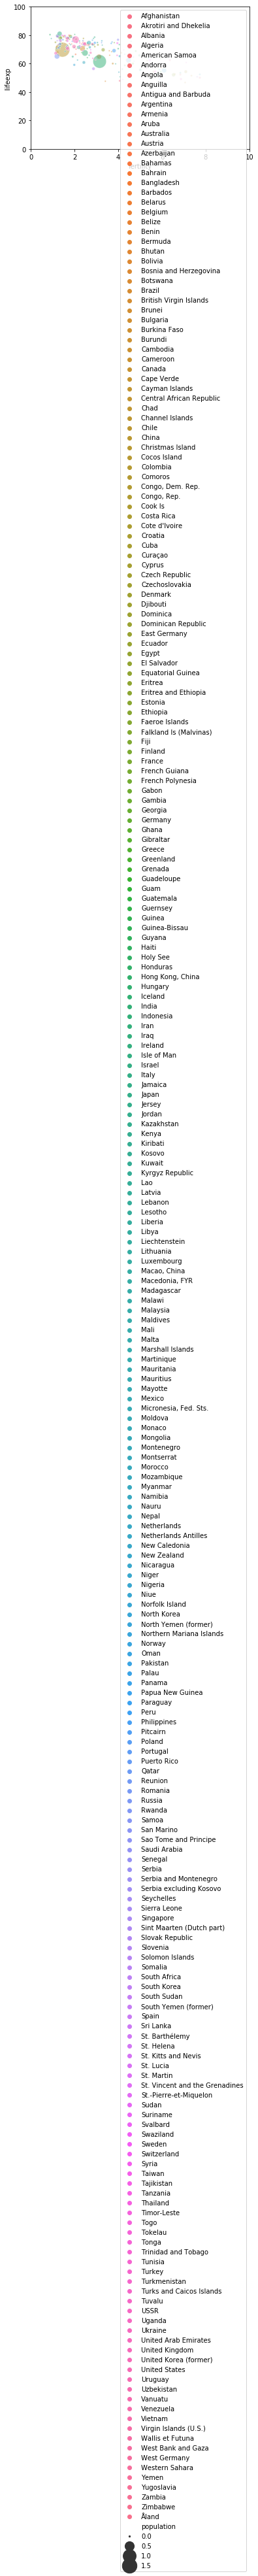

In [74]:
df6 = df3.unstack(1)
df6 = df6[2000]
df6 = df6.unstack(1)


g = sns.scatterplot(df6['fertility'], df6['lifeexp'], hue=df6.index, alpha= 0.5, size=df6['population'], sizes=(5, 500))
g.axis((0,10,0,100))
g.legend_.remove()


In [35]:
df7 = df3.unstack(1)

### The wrong way to do it:

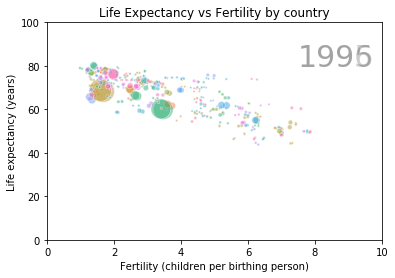

In [71]:
for year in range(1995,1997):
    df8 = df7[year]
    df8 = df8.unstack(1)
    
    g = sns.scatterplot(df8['fertility'], df8['lifeexp'], hue=df8.index, alpha= 0.5, size=df8['population'], sizes=(5, 500), ax = (0,10,0,100))
    g.axis((0,10,0,100))
    g.legend_.remove() 
    g.text(7.5, 80, year, fontsize=30, alpha=0.2)
    g.set(xlabel="Fertility (children per birthing person)", ylabel = "Life expectancy (years)", title="Life Expectancy vs Fertility by country")
    fig = g.get_figure()
    #fig.savefig("seaborn_"+str(year)+'.png')
    

### The right way to do it:

In [61]:
for year in range(1961,2016):
    df8 = df7[year]
    df8 = df8.unstack(1)
    
    g = sns.scatterplot(df8['fertility'], df8['lifeexp'], hue=df8.index, alpha= 0.5, size=df8['population'], sizes=(5,500))
    g.axis((0,10,0,100))
    g.legend_.remove() 
    g.text(7.5, 80, year, fontsize=30, alpha=0.2)
    
    g.set(xlabel="Fertility (children per birthing person)", ylabel = "Life expectancy (years)", title="Life Expectancy vs Fertility by country")
    
    
    g.get_figure().savefig("seaborn_"+str(year)+'.png') #Makes figure and saves it
    g.get_figure().clf() # this clears the figure




<Figure size 432x288 with 0 Axes>

In [63]:
images = []

for i in range(1961, 2016):
    filename = "seaborn_"+str(i)+'.png'
    images.append(imageio.imread(filename))

imageio.mimsave('seaborn_output.gif', images, fps=10)